### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, classification_report, plot_roc_curve

### Loading dataset

In [2]:
df = pd.read_csv('AccidentsLondon_d5.csv', index_col=0)
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
825,200501CP00086,533440,180700,-0.078534,51.509426,1,3,2,1,17/05/2005,...,0,5,1,1,1,0,0,1,2,E01004293
4770,200501GD10196,536810,184340,-0.028590,51.541331,1,3,1,1,11/01/2005,...,1,0,1,1,1,0,0,1,3,E01004223
4840,200501GD10277,534220,183140,-0.066373,51.531168,1,3,2,1,02/04/2005,...,0,1,1,1,1,0,0,1,2,E01001774
4849,200501GD10289,537190,183530,-0.023430,51.533960,1,3,2,1,02/04/2005,...,0,0,1,1,1,0,0,1,1,E01004227
4967,200501GD10433,534220,183140,-0.066373,51.531168,1,3,2,1,16/05/2005,...,0,0,1,1,1,0,0,1,1,E01001774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138009,201001TC00067,536380,183260,-0.035205,51.531730,1,3,2,1,16/02/2010,...,0,1,1,2,2,0,0,1,1,E01004228
138012,201001TC00071,537550,182170,-0.018773,51.521651,1,3,2,1,18/01/2010,...,0,0,1,1,1,0,0,1,1,E01004242
138022,201001TC00083,533960,181380,-0.070787,51.515414,1,2,1,1,17/03/2010,...,0,1,4,1,1,0,0,1,1,E01004325
138023,201001TC00084,534500,181720,-0.062880,51.518341,1,2,2,1,02/03/2010,...,0,5,4,1,1,0,0,1,1,E01004309


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 825 to 138027
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               4967 non-null   object 
 1   Location_Easting_OSGR                        4967 non-null   int64  
 2   Location_Northing_OSGR                       4967 non-null   int64  
 3   Longitude                                    4967 non-null   float64
 4   Latitude                                     4967 non-null   float64
 5   Police_Force                                 4967 non-null   int64  
 6   Accident_Severity                            4967 non-null   int64  
 7   Number_of_Vehicles                           4967 non-null   int64  
 8   Number_of_Casualties                         4967 non-null   int64  
 9   Date                                         4967 non-null   object 
 

### Data Transformation

This section includes the conversion of numerical values of the features to theirrespective categorical values.

In [5]:
all_sheets = pd.read_excel("metadata.xls", sheet_name=None)

In [6]:
mapper_police_force = all_sheets["Police Force"].set_index("code")["label"].to_dict()
df.Police_Force = df.Police_Force.map(mapper_police_force)

In [7]:
mapper_accident_severity = all_sheets["Accident Severity"].set_index("code")["label"].to_dict()
df.Accident_Severity = df.Accident_Severity.map(mapper_accident_severity)

In [8]:
df.Accident_Severity.unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [9]:
df.Day_of_Week.unique()

array([3, 7, 2, 4, 1, 5, 6], dtype=int64)

In [10]:
mapper_week_days = all_sheets["Day of Week"].set_index("code")["label"].to_dict()
df.Day_of_Week = df.Day_of_Week.map(mapper_week_days)

In [11]:
mapper_local_auth_dist = all_sheets["Local Authority (District)"].set_index("code")["label"].to_dict()
df.Local_Authority_District = df.Local_Authority_District.map(mapper_local_auth_dist)

In [12]:
mapper_1st_road_cls = all_sheets["1st Road Class"].set_index("code")["label"].to_dict()
df['1st_Road_Class'] = df['1st_Road_Class'] .map(mapper_1st_road_cls)

In [13]:
df['1st_Road_Class'] .unique()

array(['C', 'A', 'B', 'Unclassified'], dtype=object)

In [14]:
mapper_2nd_road_cls = all_sheets["2nd Road Class"].set_index("code")["label"].to_dict()
df['2nd_Road_Class'] = df['2nd_Road_Class'] .map(mapper_2nd_road_cls)

In [15]:
df['2nd_Road_Class'] .unique()

array(['A', nan, 'C', 'Unclassified', 'B'], dtype=object)

In [16]:
mapper_road_type = all_sheets["Road Type"].set_index("code")["label"].to_dict()
df.Road_Type = df.Road_Type.map(mapper_road_type)

In [17]:
df.Road_Type.unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [18]:
mapper_Junction_Detail = all_sheets["Junction Detail"].set_index("code")["label"].to_dict()
df.Junction_Detail = df.Junction_Detail.map(mapper_Junction_Detail)

In [19]:
df.Junction_Detail.unique()

array(['T or staggered junction', 'Not at junction or within 20 metres',
       'Crossroads', 'More than 4 arms (not roundabout)',
       'Other junction', 'Slip road', 'Mini-roundabout',
       'Private drive or entrance', 'Roundabout'], dtype=object)

In [20]:
mapper_Junction_Control = all_sheets["Junction Control"].set_index("code")["label"].to_dict()
df.Junction_Control = df.Junction_Control.map(mapper_Junction_Control)

In [21]:
mapper_Pedestrian_Crossing_Human = all_sheets["Ped Cross - Human"].set_index("code")["label"].to_dict()
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].map(mapper_Pedestrian_Crossing_Human)

In [22]:
mapper_Pedestrian_Crossing_phy = all_sheets["Ped Cross - Physical"].set_index("code")["label"].to_dict()
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].map(mapper_Pedestrian_Crossing_phy)

In [23]:
mapper_light_cond = all_sheets["Light Conditions"].set_index("code")["label"].to_dict()
df.Light_Conditions = df.Light_Conditions.map(mapper_light_cond)

In [24]:
df.Light_Conditions.unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

In [25]:
mapper_Weather_Conditions = all_sheets["Weather"].set_index("code")["label"].to_dict()
df.Weather_Conditions = df.Weather_Conditions.map(mapper_Weather_Conditions)

In [26]:
mapper_Road_Surface = all_sheets["Road Surface"].set_index("code")["label"].to_dict()
df.Road_Surface_Conditions = df.Road_Surface_Conditions.map(mapper_Road_Surface)

In [27]:
mapper_Special_Conditions_at_Site = all_sheets["Special Conditions at Site"].set_index("code")["label"].to_dict()
df.Special_Conditions_at_Site = df.Special_Conditions_at_Site.map(mapper_Special_Conditions_at_Site)

In [28]:
mapper_Carriageway_Hazards = all_sheets["Carriageway Hazards"].set_index("code")["label"].to_dict()
df.Carriageway_Hazards = df.Carriageway_Hazards.map(mapper_Carriageway_Hazards)

In [29]:
mapper_Urban_or_Rural = all_sheets["Urban Rural"].set_index("code")["label"].to_dict()
df.Urban_or_Rural_Area = df.Urban_or_Rural_Area.map(mapper_Urban_or_Rural)

In [30]:
mapper_pol_off_attend = all_sheets["Police Officer Attend"].set_index("code")["label"].to_dict()
df.Did_Police_Officer_Attend_Scene_of_Accident = df.Did_Police_Officer_Attend_Scene_of_Accident.map(mapper_pol_off_attend)

In [31]:
df['Local_Authority_Highway'].unique()

array(['E09000030'], dtype=object)

In [32]:
df['Local_Authority_Highway'] = df['Local_Authority_Highway'].replace(['E09000030'], 'Tower Hamlets')

In [33]:
df['Local_Authority_Highway'].unique()

array(['Tower Hamlets'], dtype=object)

In [34]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
825,200501CP00086,533440,180700,-0.078534,51.509426,Metropolitan Police,Slight,2,1,17/05/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,No,E01004293
4770,200501GD10196,536810,184340,-0.028590,51.541331,Metropolitan Police,Slight,1,1,11/01/2005,...,Control by school crossing patrol,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,E01004223
4840,200501GD10277,534220,183140,-0.066373,51.531168,Metropolitan Police,Slight,2,1,02/04/2005,...,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,No,E01001774
4849,200501GD10289,537190,183530,-0.023430,51.533960,Metropolitan Police,Slight,2,1,02/04/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,E01004227
4967,200501GD10433,534220,183140,-0.066373,51.531168,Metropolitan Police,Slight,2,1,16/05/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,E01001774


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 825 to 138027
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               4967 non-null   object 
 1   Location_Easting_OSGR                        4967 non-null   int64  
 2   Location_Northing_OSGR                       4967 non-null   int64  
 3   Longitude                                    4967 non-null   float64
 4   Latitude                                     4967 non-null   float64
 5   Police_Force                                 4967 non-null   object 
 6   Accident_Severity                            4967 non-null   object 
 7   Number_of_Vehicles                           4967 non-null   int64  
 8   Number_of_Casualties                         4967 non-null   int64  
 9   Date                                         4967 non-null   object 
 

### Data Preprocessing

In [36]:
missing_values = df.isnull().sum()

<AxesSubplot:>

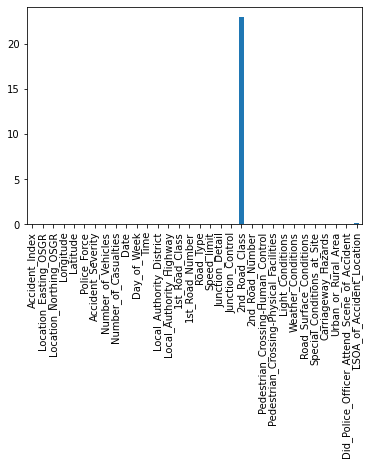

In [37]:
# Percentage of missing values in each column
(missing_values / len(df) * 100).plot.bar()

In [38]:
df['2nd_Road_Class'].unique()

array(['A', nan, 'C', 'Unclassified', 'B'], dtype=object)

In [39]:
Mode_Category = df['2nd_Road_Class'].mode()[0]
Mode_Category

'Unclassified'

In [40]:
df['2nd_Road_Class'].fillna(Mode_Category,inplace=True)

In [41]:
df.dropna(subset=['LSOA_of_Accident_Location'], inplace=True)

In [42]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
Local_Authority_Highway                        0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

### Exploratory data Analysis

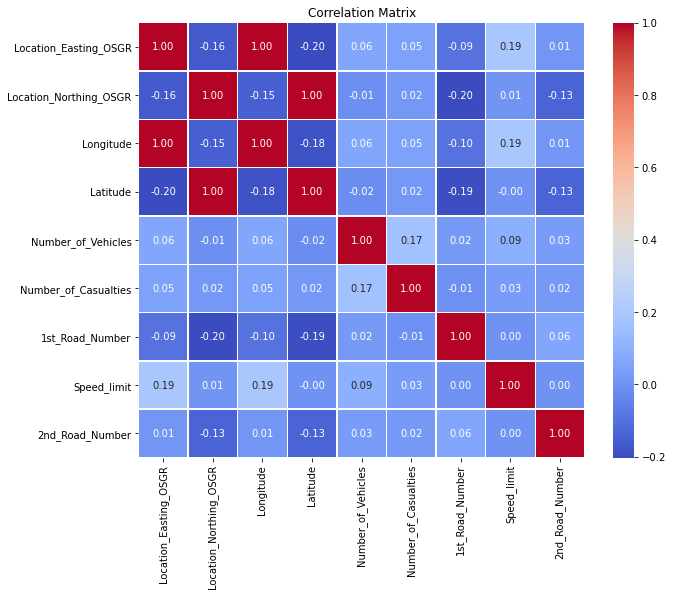

In [43]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

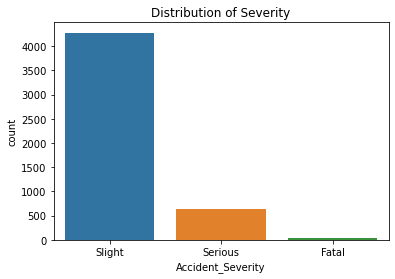

In [44]:
# Distribution of Severity
plt.figure(figsize=(6, 4))
sns.countplot(df['Accident_Severity'])
plt.title("Distribution of Severity")
plt.show()

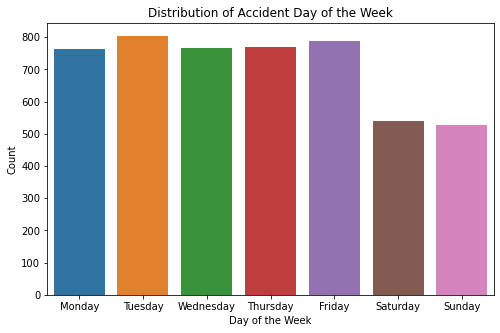

In [45]:
# Distribution of Accident Day of the Week
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(8, 5))
sns.countplot(df['Day_of_Week'], order=weekday_order)
plt.title("Distribution of Accident Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

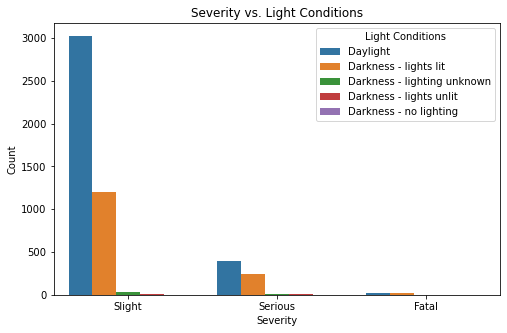

In [46]:
# Severity vs. Light Conditions
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', hue='Light_Conditions', data=df)
plt.title("Severity vs. Light Conditions")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Light Conditions", loc="upper right")
plt.show()

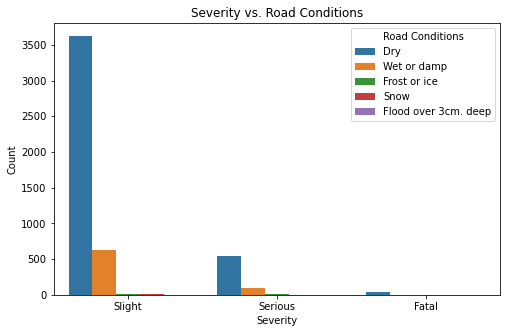

In [47]:
# Severity vs. Road Conditions
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', hue='Road_Surface_Conditions', data=df)
plt.title("Severity vs. Road Conditions")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Road Conditions", loc="upper right")
plt.show()

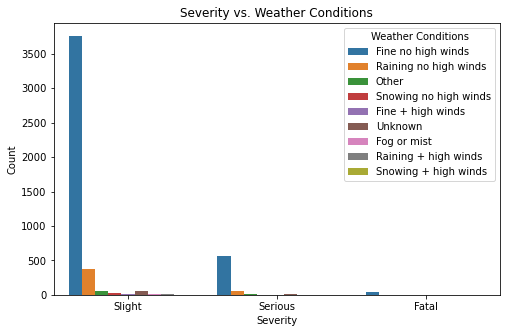

In [48]:
# Severity vs. Weather Conditions
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', hue='Weather_Conditions', data=df)
plt.title("Severity vs. Weather Conditions")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Weather Conditions", loc="upper right")
plt.show()

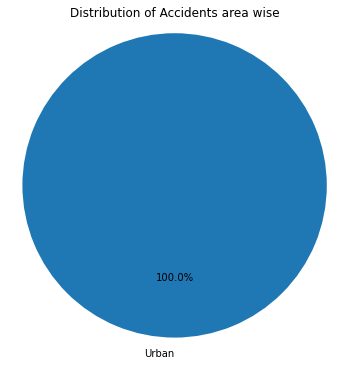

In [49]:
# Pie Chart: Distribution of Collision Types
collision_type_counts = df['Urban_or_Rural_Area'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(collision_type_counts, labels=collision_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Accidents area wise")
plt.axis('equal')
plt.show()

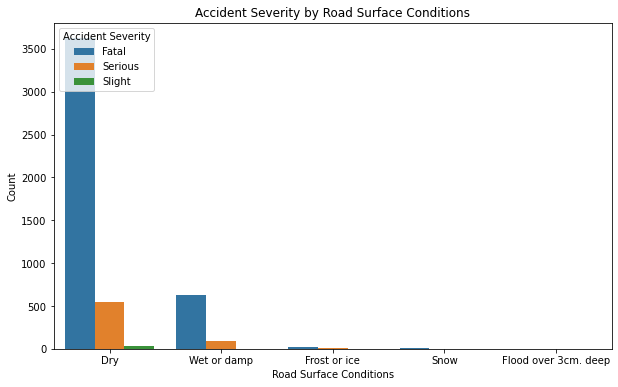

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Surface_Conditions', hue='Accident_Severity', data=df)
plt.title("Accident Severity by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Count")
plt.legend(title='Accident Severity', labels=['Fatal', 'Serious', 'Slight'])
plt.show()

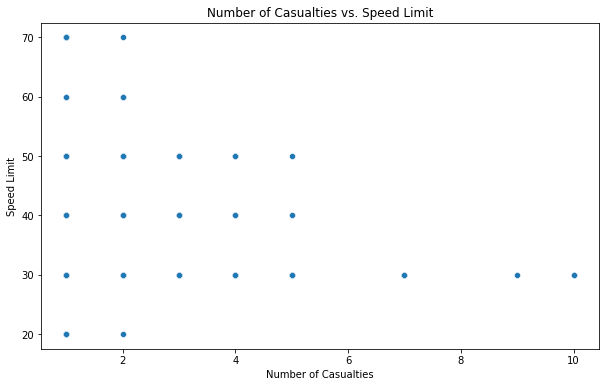

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Casualties', y='Speed_limit', data=df)
plt.title("Number of Casualties vs. Speed Limit")
plt.xlabel("Number of Casualties")
plt.ylabel("Speed Limit")
plt.show()

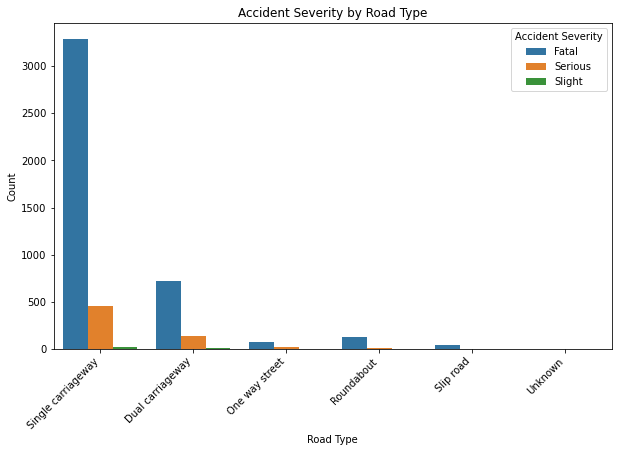

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Type', hue='Accident_Severity', data=df)
plt.title("Accident Severity by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.legend(title="Accident Severity", loc='upper right', labels=['Fatal', 'Serious', 'Slight'])
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0, 0.5, 'Count')

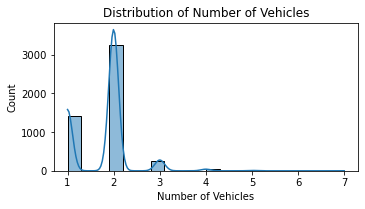

In [53]:
plt.figure(figsize=(12, 6))

# Histogram for Number of Vehicles
plt.subplot(2, 2, 1)
sns.histplot(df['Number_of_Vehicles'], bins=20, kde=True)
plt.title("Distribution of Number of Vehicles")
plt.xlabel("Number of Vehicles")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

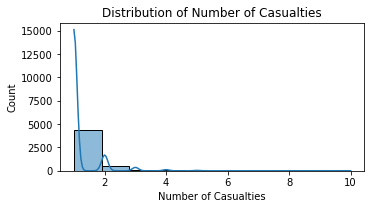

In [54]:
# Histogram for Number of Casualties
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.histplot(df['Number_of_Casualties'], bins=10, kde=True)
plt.title("Distribution of Number of Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Count")

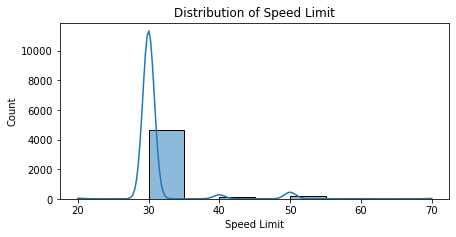

In [55]:
# Histogram for Speed Limit
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.histplot(df['Speed_limit'], bins=10, kde=True)
plt.title("Distribution of Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Data Preparation

In [56]:
cols = df.select_dtypes("O").columns
cols

Index(['Accident_Index', 'Police_Force', 'Accident_Severity', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_District',
       'Local_Authority_Highway', '1st_Road_Class', 'Road_Type',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [57]:
cols = ['Accident_Index', 'Police_Force', 'Accident_Severity', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_District',
       'Local_Authority_Highway', '1st_Road_Class', 'Road_Type',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in cols:
    df[i] = encoder.fit_transform(df[i])
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
825,0,533440,180700,-0.078534,51.509426,0,2,2,1,1024,...,2,3,4,1,0,3,1,0,0,100
4770,1,536810,184340,-0.028590,51.541331,0,2,1,1,624,...,1,2,4,1,0,3,1,0,1,31
4840,2,534220,183140,-0.066373,51.531168,0,2,2,1,80,...,2,5,4,1,0,3,1,0,0,2
4849,3,537190,183530,-0.023430,51.533960,0,2,2,1,80,...,2,2,4,1,0,3,1,0,2,35
4967,4,534220,183140,-0.066373,51.531168,0,2,2,1,961,...,2,2,4,1,0,3,1,0,2,2


In [58]:
from sklearn.model_selection import train_test_split

# Separate the input features (X) and the target variable (y)
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

In [59]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.inspection import permutation_importance
rf_estimator = RandomForestClassifier()
rf_estimator.fit(X_train, y_train)

r = permutation_importance(rf_estimator, X_test, y_test, n_repeats=10, random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean
perm['AVG_Importance']

Accident_Index                                 3.021148e-03
Location_Easting_OSGR                          2.014099e-04
Location_Northing_OSGR                         1.208459e-03
Longitude                                      2.014099e-04
Latitude                                      -3.021148e-04
Police_Force                                   0.000000e+00
Number_of_Vehicles                             2.719033e-03
Number_of_Casualties                           4.028197e-04
Date                                           1.107754e-03
Day_of_Week                                   -5.035247e-04
Time                                           1.107754e-03
Local_Authority_District                       0.000000e+00
Local_Authority_Highway                        0.000000e+00
1st_Road_Class                                 2.014099e-04
1st_Road_Number                                1.110223e-17
Road_Type                                      9.063444e-04
Speed_limit                             

<AxesSubplot:>

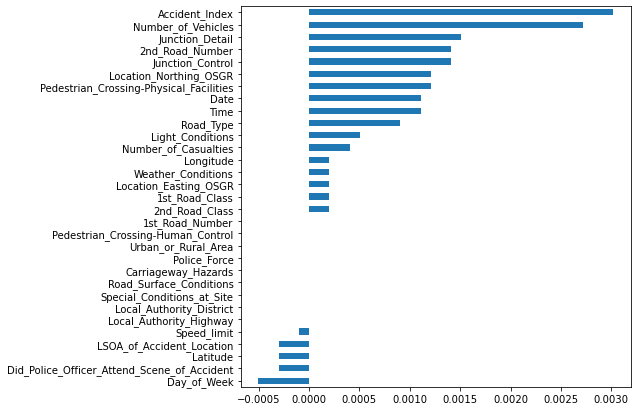

In [62]:
perm = perm.sort_values(by=['AVG_Importance'])
fig = plt.figure(figsize=(7,7))
perm['AVG_Importance'].plot(kind="barh")

In [63]:

df = df[['Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time','1st_Road_Class', '1st_Road_Number', 
        'Road_Type', 'Speed_limit', '2nd_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Physical_Facilities', 
        'Light_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Surface_Conditions', 'Accident_Severity']]

df.head()

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,Road_Surface_Conditions,Accident_Severity
825,2,1,5,796,2,0,3,30,0,3211,3,4,0,0,2
4770,1,1,5,272,0,102,3,30,3,0,2,4,1,0,2
4840,2,1,2,508,0,1208,3,30,2,0,5,4,0,0,2
4849,2,1,2,423,0,12,0,40,3,0,2,4,2,0,2
4967,2,1,1,783,0,1208,3,30,2,0,2,4,2,0,2


In [64]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [65]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### kmeans clustering

In [66]:

# Choose the value of K based on the plots (e.g., K=4)
chosen_k = 4

# Fit K-means model with the chosen K
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)

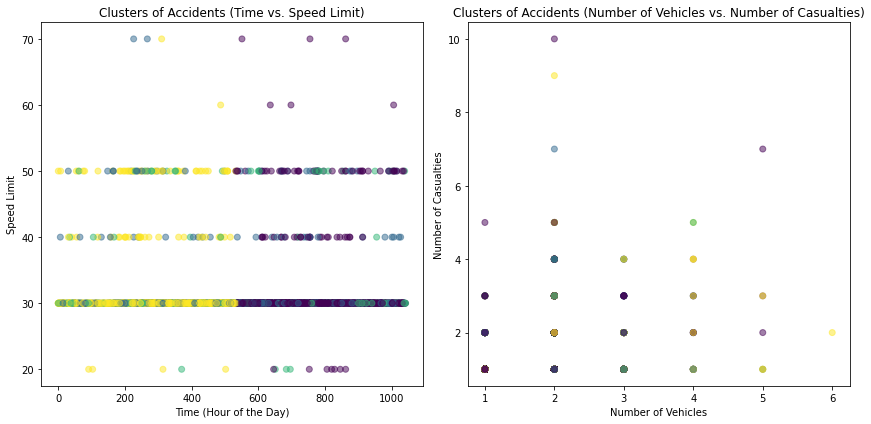

In [67]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['Time'], X_train['Speed_limit'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Time (Hour of the Day)')
plt.ylabel('Speed Limit')
plt.title('Clusters of Accidents (Time vs. Speed Limit)')

plt.subplot(1, 2, 2)
plt.scatter(X_train['Number_of_Vehicles'], X_train['Number_of_Casualties'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.title('Clusters of Accidents (Number of Vehicles vs. Number of Casualties)')

plt.tight_layout()
plt.show()

## Decision tree

In [68]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [69]:
y_pred = dt_model.predict(X_test)

In [70]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

Decision Tree Model Evaluation Metrics:
Accuracy: 0.7593152064451159
Precision: 0.7891445152035471
Recall: 0.7593152064451159
F1 Score: 0.7734927823916297

Confusion Matrix:


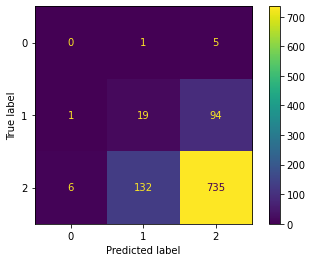

In [71]:
print("Decision Tree Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
plot_confusion_matrix(dt_model, X_test, y_test)
plt.show()

### K-nearest neighbors 

In [72]:
# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors, but you can try different values
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_test)

Accuracy: 0.8539778449144008
Precision: 0.7799945412278473
Recall: 0.8539778449144008
F1 Score: 0.8133898070809391
Confusion Matrix:


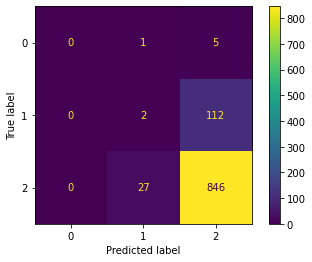

In [73]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
plot_confusion_matrix(knn_model, X_test, y_test)
plt.show()